# ⚠️ Read Me: Foreword

The purpose of this notebook is to **build a dataset to train the model on**. 

> **NOTE**
>
> **Therefore, it has to be run BEFORE `modeling.ipynb`.**

# Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/tmp/ipykernel_75082/264398729.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


The two following sections were motivated by the idea of totally creating the environment to run the project.

Unfortunately, for the moment, the download from Google Drive leaves issues.

## Loading into a Pandas DataFrame

In [4]:
%%time
df = pd.read_csv("../data/SBAnational.csv")

<timed exec>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 3.57 s, sys: 653 ms, total: 4.22 s
Wall time: 4.26 s


# Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

# Fix Anomalies

In [6]:
def amount_to_float(s: str) -> float:
    """Converts a 'string' amount in $ to its float value"""
    return float(s[1:].replace(',', ''))

In [7]:
df.ChgOffPrinGr = df.ChgOffPrinGr.map(amount_to_float)

In [8]:
df.query("MIS_Status == 'P I F' and ChgOffPrinGr > 0")

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
558,1004176005,GREENLIFE MOBILE,SAN JOSE,CA,95132,BBCN BANK,CA,561730,7-Feb-06,2006,...,0,N,19-Oct-09,28-Feb-06,"$5,000.00",$0.00,P I F,3330.0,"$5,000.00","$4,250.00"
850,1005925000,GILLIAN'S DELICATESSEN & CATER,FLORAL PARK,NY,11001,JPMORGAN CHASE BANK NATL ASSOC,IL,722320,26-Mar-03,2003,...,N,N,29-Mar-06,31-Mar-03,"$15,000.00",$0.00,P I F,10270.0,"$15,000.00","$7,500.00"
853,1005936010,TRICAS MANAGEMENT SERVICES LLC,DALLAS,TX,75218,WELLS FARGO BANK NATL ASSOC,SD,621511,8-Feb-06,2006,...,Y,N,2-Feb-09,31-Mar-06,"$165,553.00",$0.00,P I F,97486.0,"$100,000.00","$50,000.00"
861,1005986003,CAPITAL EXPLOSION GRAPHIC DESI,UPPER MARLBORO (MARLBORO),MD,20774,BBCN BANK,CA,541430,8-Feb-06,2006,...,0,N,14-Aug-12,28-Feb-06,"$10,000.00",$0.00,P I F,2310.0,"$10,000.00","$8,500.00"
866,1006016007,C-BARB AND CONLEY PROMOTIONAL,HOUSTON,TX,77057,BBCN BANK,CA,421450,8-Feb-06,2006,...,0,N,1-Jun-09,28-Feb-06,"$5,000.00",$0.00,P I F,3783.0,"$5,000.00","$4,250.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895467,9913513005,INFINITE TECH. CORPORATION,RICHARDSON,TX,75080,LEGACYTEXAS BANK,TX,541512,23-Jan-97,1997,...,N,N,29-Dec-11,31-May-97,"$441,000.00",$0.00,P I F,6462.0,"$441,000.00","$330,750.00"
895669,9918003004,"ANRO INSULATION, INC.",STAFFORD,VA,22554,MANUFACTURERS & TRADERS TR CO,MD,235420,24-Jan-97,1997,...,N,Y,22-Mar-00,19-Feb-97,"$50,000.00",$0.00,P I F,46165.0,"$50,000.00","$40,000.00"
897114,9950351001,CLUB 191,PORTSMOUTH,IA,51565,NaN,NaN,0,24-Jul-78,1978,...,N,N,23-Nov-88,6-Dec-78,"$65,000.00",$0.00,P I F,20878.0,"$65,000.00","$48,750.00"
897735,9963813010,"J.T. AUTOMOTIVE SERVICES, LLC",SOUTHINGTON,CT,6489,"TD BANK, NATIONAL ASSOCIATION",DE,0,13-Feb-97,1997,...,N,Y,26-Apr-06,31-May-97,"$60,000.00",$0.00,P I F,17236.0,"$60,000.00","$48,000.00"


In [9]:
anomalies = (df.MIS_Status == 'P I F') & (df.ChgOffPrinGr > 0)
df.loc[anomalies, "MIS_Status"] = "CHGOFF"

# Removing Leaking Features

In [10]:
target_leaking_cols = [
    "ChgOffDate", "ChgOffPrinGr",
    "DisbursementDate", "DisbursementGross", "BalanceGross",
]
df = df.drop(columns = target_leaking_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanNr_ChkDgt  899164 non-null  int64  
 1   Name           899150 non-null  object 
 2   City           899134 non-null  object 
 3   State          899150 non-null  object 
 4   Zip            899164 non-null  int64  
 5   Bank           897605 non-null  object 
 6   BankState      897598 non-null  object 
 7   NAICS          899164 non-null  int64  
 8   ApprovalDate   899164 non-null  object 
 9   ApprovalFY     899164 non-null  object 
 10  Term           899164 non-null  int64  
 11  NoEmp          899164 non-null  int64  
 12  NewExist       899028 non-null  float64
 13  CreateJob      899164 non-null  int64  
 14  RetainedJob    899164 non-null  int64  
 15  FranchiseCode  899164 non-null  int64  
 16  UrbanRural     899164 non-null  int64  
 17  RevLineCr      894636 non-nul

# Missing Values Cartography Beforehand

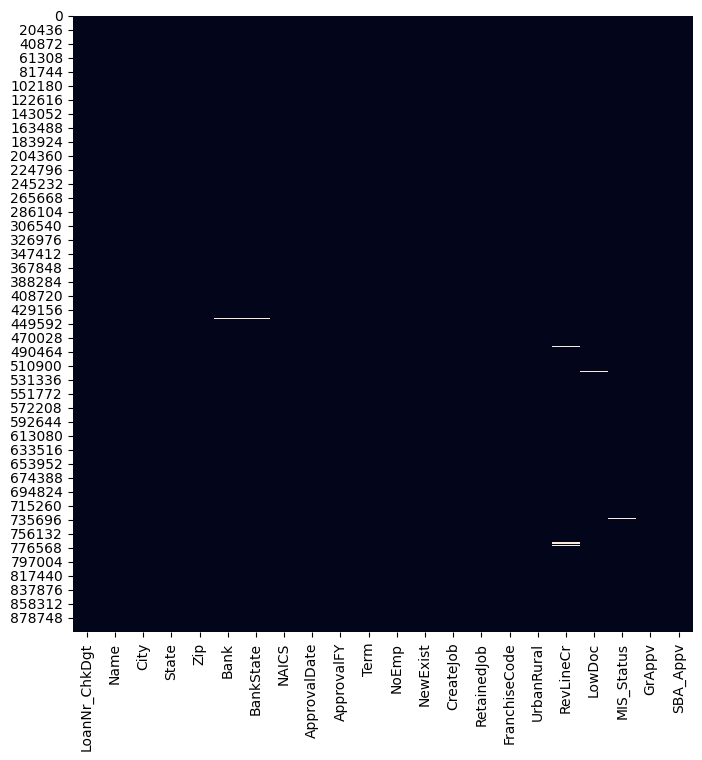

CPU times: user 15.7 s, sys: 620 ms, total: 16.3 s
Wall time: 16 s


In [11]:
%%time
plt.figure(figsize=(8, 8))
sns.heatmap(df.isna(), cbar=None)
plt.show()

# Detailed Cleaning 

## `City` (manage `NaN`)

In [12]:
df.City.isna().sum()

30

## `State` (manage `NaN`)

In [13]:
df.State.isna().sum()

14

## `Regions`

In [14]:
REGIONS = {
    "AL": "Southeast",
    "AK": "Northwest",
    "AZ": "Southwest",
    "AR": "Southeast",
    "CA": "Southwest",
    "CO": "Southwest",
    "CT": "Northeast",
    "DC": "Northeast",
    "DE": "Northeast",
    "FL": "Southeast",
    "GA": "Southeast",
    "HI": "Northwest",
    "ID": "Northwest",
    "IL": "Northeast",
    "IN": "Northeast",
    "IA": "Northwest",
    "KS": "Northwest",
    "KY": "Southeast",
    "LA": "Southeast",
    "ME": "Northeast",
    "MD": "Northeast",
    "MA": "Northeast",
    "MI": "Northeast",
    "MN": "Northwest",
    "MS": "Southeast",
    "MO": "Northwest",
    "MT": "Northwest",
    "NE": "Northwest",
    "NV": "Northwest",
    "NH": "Northeast",
    "NJ": "Northeast",
    "NM": "Southwest",
    "NY": "Northeast",
    "NC": "Southeast",
    "ND": "Northwest",
    "OH": "Northeast",
    "OK": "Southwest",
    "OR": "Northwest",
    "PA": "Northeast",
    "RI": "Northeast",
    "SC": "Southeast",
    "SD": "Northwest",
    "TN": "Southeast",
    "TX": "Southwest",
    "UT": "Northwest",
    "VT": "Northeast",
    "VA": "Southeast",
    "WA": "Northwest",
    "WV": "Southeast",
    "WI": "Northwest",
    "WY": "Northwest"
}

In [15]:
df["Region"] = df.State.map(REGIONS)

## `Zip` (will be droped)

## `Bank` (manage `NaN`)

In [16]:
df.Bank.isna().sum()

1559

## `BankState` (manage `NaN`)

In [17]:
df.Bank.isna().sum()

1559

## Add `SameState`

In [18]:
df["SameState"] = (df.State == df.BankState)

## `NAICS`

In [19]:
NAICS_MAPPING = {
    "0": np.nan,
    "11": "AgricultureForestryFishingAndHunting",
    "21": "MiningQuarryingAndOilAndGasExtraction",
    "22": "Utilities",
    "23": "Construction",
    "31": "Manufacturing",
    "32": "Manufacturing",
    "33": "Manufacturing",
    "42": "WholesaleTrade",
    "44": "RetailTrade",
    "45": "RetailTrade",
    "48": "TransportationAndWarehousing",
    "49": "TransportationAndWarehousing",
    "51": "Information",
    "52": "FinanceAndInsurance",
    "53": "RealEstateAndRentalAndLeasing",
    "54": "ProfessionalScientificAndTechnicalServices",
    "55": "ManagementOfCompaniesAndEnterprises",
    "56": "AdministrativeAndSupportAndWasteManagementAndRemediationServices",
    "61": "EducationalServices",
    "62": "HealthCareAndSocialAssistance",
    "71": "ArtsEntertainmentAndRecreation",
    "72": "AccommodationAndFoodServices",
    "81": "OtherServicesExceptPublicAdministration",
    "92": "PublicAdministration"
}

def map_NAICS_to_cats(n: int) -> str:
    """Map a NAICS integer to its counterpart category"""
    cat_digits = str(n)[:2]
    return NAICS_MAPPING.get(cat_digits)

In [20]:
df.NAICS = df.NAICS.map(map_NAICS_to_cats)

In [21]:
df.NAICS.value_counts(normalize=True, dropna=False)

NAICS
NaN                                                                 0.224595
RetailTrade                                                         0.141521
OtherServicesExceptPublicAdministration                             0.080762
ProfessionalScientificAndTechnicalServices                          0.075815
Manufacturing                                                       0.075658
AccommodationAndFoodServices                                        0.075181
Construction                                                        0.074120
HealthCareAndSocialAssistance                                       0.061575
WholesaleTrade                                                      0.054209
AdministrativeAndSupportAndWasteManagementAndRemediationServices    0.036350
TransportationAndWarehousing                                        0.025058
ArtsEntertainmentAndRecreation                                      0.016282
RealEstateAndRentalAndLeasing                                       0.

## `ApprovalDate` (will be droped)

## `ApprovalFY` (Feature Engineering)

In [23]:
df.ApprovalFY = df.ApprovalFY.astype("str")

def is_year_a_recession(year_str: str) -> bool:
    """
    Output if a year is a recession one according to data from the NBER
    National Bureau of Economic Research.
    This is valid until 2023 included.
    """
    RECESSION_PERIODS = [
    (1969, 1970),
    (1973, 1975),
    (1980, 1980),
    (1981, 1982),
    (1990, 1991),
    (2001, 2001),
    (2007, 2009),
    (2020, 2020),  # Including the COVID-19 pandemic recession
    ]
    try:
        year = int(year_str)
    except ValueError:
        year = int(year_str[:-1])
    return any(start <= year <= end for start, end in RECESSION_PERIODS)

df["Recession"] = df.ApprovalFY.map(is_year_a_recession)

## `Term` (No Cleaning - Problem with aberrant values: 0)

In [24]:
df.query("Term == 0")

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Region,SameState,Recession
635,1004675006,Katharine Crowley dba K. Crowl,SAN ANSELMO,CA,94960,CALIFORNIA BANK & TRUST,CA,RetailTrade,2001-06-25,2001,...,1,0,Y,N,CHGOFF,"$29,000.00","$14,500.00",Southwest,True,True
673,1004896009,Q & P MARKET INC,BROOKLYN,NY,11226,WELLS FARGO BANK NATL ASSOC,SD,WholesaleTrade,2006-02-07,2006,...,1,1,Y,N,CHGOFF,"$30,000.00","$15,000.00",Northeast,False,False
776,1005505003,"Beckwith Printing, Inc.",LAS VEGAS,NV,89118,CALIFORNIA BANK & TRUST,CA,Manufacturing,2003-01-10,2003,...,1,0,Y,N,CHGOFF,"$50,000.00","$25,000.00",Northwest,False,False
916,1006305004,"C.O.K.Y., Inc.",MIAMI,FL,33145,CALIFORNIA BANK & TRUST,CA,Manufacturing,2003-04-18,2003,...,1,0,N,N,CHGOFF,"$150,000.00","$75,000.00",Southeast,False,False
1084,1007465008,Waldorf Tuxedo LLC,WARWICK,RI,2888,BANK RHODE ISLAND,RI,RealEstateAndRentalAndLeasing,2003-07-31,2003,...,1,0,Y,N,CHGOFF,"$150,000.00","$75,000.00",Northeast,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891986,9847764007,SUNDAY A AZAH dba XPRESSWAY LA,SAN JOSE,CA,95124,WELLS FARGO BANK NATL ASSOC,SD,OtherServicesExceptPublicAdministration,2006-02-02,2006,...,1,1,Y,N,CHGOFF,"$16,000.00","$8,000.00",Southwest,False,False
894913,9900263003,STRATEGIC MOTIVATION RESOURCES,ST. LOUIS,MO,63102,EAGLE BK & TR CO OF MISSOURI,MO,NaN,1997-01-16,1997,...,1,0,N,Y,CHGOFF,"$93,000.00","$74,400.00",Northwest,True,False
895325,9910343007,SIEGEL JEWELERS,GRAND RAPIDS,MI,49501,UNITED BANK OF MICHIGAN,MI,RetailTrade,1997-01-22,1997,...,1,0,0,N,CHGOFF,"$1,100,000.00","$748,000.00",Northeast,True,False
896757,9942393005,"RELICARE, INC.",ELIZABETHTOWN,KY,42701,"PNC BANK, NATIONAL ASSOCIATION",KY,NaN,1997-02-05,1997,...,1,0,N,Y,CHGOFF,"$40,000.00","$32,000.00",Southeast,True,False


## `NoEmp` (No Cleaning)

## `NewExist`

In [25]:
df.NewExist.unique()

array([ 2.,  1.,  0., nan])

In [26]:
def encode_NewExist(x: float) -> str:
    if x == 2:
        return "Y"
    elif x == 1:
        return "N"
    return np.nan

df.NewExist = df.NewExist.map(encode_NewExist)

In [27]:
df.NewExist.value_counts(normalize=True, dropna=False)

NewExist
N      0.717187
Y      0.281511
NaN    0.001301
Name: proportion, dtype: float64

## `CreateJob` (No Cleaning)

## `RetainedJob` (No Cleaning)

## `FranchiseCode` (YN)

In [28]:
def is_franchise(code: int) -> str:
    return "N" if code in (0, 1) else "Y"

df.FranchiseCode = df.FranchiseCode.map(is_franchise)
df = df.rename(columns = {"FranchiseCode": "Franchise"})

## `UrbanRural` (Manage `NaN`)

In [29]:
df.UrbanRural.unique()

array([0, 1, 2])

In [30]:
df.UrbanRural = df.UrbanRural.map({0: np.nan, 1: "U", 2: "R"})

In [31]:
df.UrbanRural.value_counts(normalize=True, dropna=False)

UrbanRural
U      0.523435
NaN    0.359408
R      0.117157
Name: proportion, dtype: float64

## `RevLineCr` (Manage `NaN`)

In [32]:
df.RevLineCr.value_counts()

RevLineCr
N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

In [33]:
def encode_RevLineCr(x: 'object') -> str:
    if x in ("N", "Y"):
        return x
    return np.nan

df.RevLineCr = df.RevLineCr.map(encode_RevLineCr)

In [34]:
df.RevLineCr.value_counts(normalize=True, dropna=False)

RevLineCr
N      0.467421
NaN    0.308597
Y      0.223982
Name: proportion, dtype: float64

## `LowDoc` (Manage `NaN`)

In [35]:
df.LowDoc.value_counts()

LowDoc
N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: count, dtype: int64

In [36]:
def encode_LowDoc(s: "object") -> str:
    if s in ("N", "Y"):
        return s
    return np.nan

df.LowDoc = df.LowDoc.map(encode_LowDoc)

In [37]:
df.LowDoc.value_counts(normalize=True, dropna=False)

LowDoc
N      0.870611
Y      0.122708
NaN    0.006681
Name: proportion, dtype: float64

## `GrAppv` (Convert to float)

In [38]:
df.GrAppv = df.GrAppv.map(amount_to_float)

## `SBA_Appv` (No cleaning)

In [39]:
df.SBA_Appv = df.SBA_Appv.map(amount_to_float)

# Missing Values Cartography Afterwards

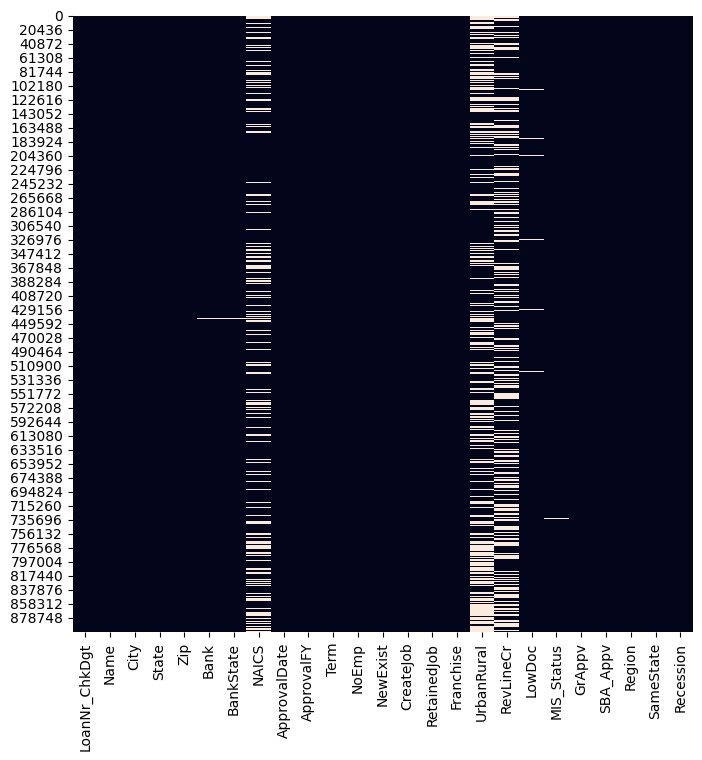

CPU times: user 17 s, sys: 741 ms, total: 17.7 s
Wall time: 17.5 s


In [40]:
%%time
plt.figure(figsize=(8, 8))
sns.heatmap(df.isna(), cbar=None)
plt.show()

In [41]:
(df
 .query("ApprovalFY < '1987'")
 .isna().sum()
)

LoanNr_ChkDgt        0
Name                 0
City                30
State                2
Zip                  0
Bank               232
BankState          233
NAICS            10598
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist            24
CreateJob            0
RetainedJob          0
Franchise            0
UrbanRural       10599
RevLineCr            0
LowDoc               0
MIS_Status          81
GrAppv               0
SBA_Appv             0
Region               2
SameState            0
Recession            0
dtype: int64

As this will be later on proved to be more efficient for the model, **we decided to drop all missing values for dataset which will feed the model**.

In [42]:
df = df.dropna()

# Check-Up and Export

## Drop `ApprovalDate`, `ApprovalFY`, `Name` and `Zip`

In [43]:
df = df.drop(columns=["ApprovalDate", "ApprovalFY", "LoanNr_ChkDgt", "Name", "Zip"])

## Reordering Columns

In [44]:
df = df[['City', 'State', 'Region', 'Bank', 'BankState', 'SameState',
         'NAICS', 'Recession', 'Term', 'NewExist', 'NoEmp', 'CreateJob',
         'RetainedJob', 'Franchise', 'UrbanRural', 'RevLineCr', 'LowDoc',
         'GrAppv', 'SBA_Appv', 'MIS_Status']]

In [52]:
df.shape

(350207, 20)

## Checkout `NaN`

In [45]:
df.isna().sum()

City           0
State          0
Region         0
Bank           0
BankState      0
SameState      0
NAICS          0
Recession      0
Term           0
NewExist       0
NoEmp          0
CreateJob      0
RetainedJob    0
Franchise      0
UrbanRural     0
RevLineCr      0
LowDoc         0
GrAppv         0
SBA_Appv       0
MIS_Status     0
dtype: int64

## 💿 Export

In [46]:
df.to_csv("../data/cleaned_df_short.csv")

# Remaining Anomalies

## `Term == 0`

In [47]:
df.query("Term == 0")

,City,State,Region,Bank,BankState,SameState,NAICS,Recession,Term,NewExist,NoEmp,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv,MIS_Status
673,BROOKLYN,NY,Northeast,WELLS FARGO BANK NATL ASSOC,SD,False,WholesaleTrade,False,0,N,10,7,10,N,U,Y,N,30000.0,15000.0,CHGOFF
1277,MANCHESTER,NH,Northeast,"TD BANK, NATIONAL ASSOCIATION",DE,False,RetailTrade,False,0,Y,1,0,0,N,U,N,N,80000.0,40000.0,CHGOFF
1414,BOXFORD,MA,Northeast,"TD BANK, NATIONAL ASSOCIATION",DE,False,AgricultureForestryFishingAndHunting,False,0,N,1,0,0,N,U,Y,N,35000.0,17500.0,CHGOFF
1616,HAMPSTEAD,MD,Northeast,MANUFACTURERS & TRADERS TR CO,MD,True,AdministrativeAndSupportAndWasteManagementAndR...,False,0,Y,1,0,0,N,U,N,N,25000.0,12500.0,CHGOFF
5190,Monroe,MI,Northeast,"PNC BANK, NATIONAL ASSOCIATION",DE,False,WholesaleTrade,False,0,N,1,0,0,N,R,Y,N,15000.0,7500.0,CHGOFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880974,TUSTIN,CA,Southwest,WELLS FARGO BANK NATL ASSOC,SD,False,Construction,False,0,N,8,2,10,N,U,Y,N,60000.0,30000.0,CHGOFF
881587,BELCOURT,ND,Northwest,CITIZENS COMMUNITY CU,ND,True,Construction,False,0,N,4,4,8,N,R,Y,N,25000.0,12500.0,CHGOFF
884703,LONG PRAIRIE,MN,Northwest,WELLS FARGO BANK NATL ASSOC,SD,False,AccommodationAndFoodServices,False,0,N,20,3,23,N,R,Y,N,15000.0,7500.0,CHGOFF
885545,TYNGSBORO,MA,Northeast,BANCO POPULAR NORTH AMERICA,NY,False,WholesaleTrade,False,0,N,7,2,7,N,U,Y,N,125000.0,62500.0,CHGOFF


In [48]:
df_no_term0 = df.query("Term > 0")
df_no_term0

,City,State,Region,Bank,BankState,SameState,NAICS,Recession,Term,NewExist,NoEmp,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv,MIS_Status
12,APEX,NC,Southeast,STEARNS BK NATL ASSOC,MN,False,RetailTrade,False,162,Y,2,0,0,Y,U,N,N,253400.0,190050.0,P I F
24,LITTLE ROCK,AR,Southeast,HOPE FCU,MS,False,AccommodationAndFoodServices,False,126,N,7,0,0,N,U,N,N,137300.0,116705.0,P I F
28,CAMARILLO,CA,Southwest,WELLS FARGO BANK NATL ASSOC,SD,False,EducationalServices,False,83,Y,18,5,23,N,U,Y,N,100000.0,50000.0,P I F
30,MIAMI,FL,Southeast,"CITIBANK, N.A.",FL,True,Construction,False,84,N,4,0,4,N,U,Y,N,35000.0,17500.0,P I F
32,NEW ORLEANS,LA,Southeast,BUSINESS RES. CAP. SPECIALTY B,LA,True,RealEstateAndRentalAndLeasing,False,60,N,3,0,0,N,U,N,N,50000.0,42500.0,P I F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894798,OCEANSIDE,CA,Southwest,JPMORGAN CHASE BANK NATL ASSOC,IL,False,Construction,False,84,N,5,1,5,N,R,Y,N,13000.0,6500.0,P I F
894801,HIGHLANDS RANCH,CO,Southwest,JPMORGAN CHASE BANK NATL ASSOC,IL,False,EducationalServices,False,84,N,2,0,2,N,R,Y,N,30000.0,15000.0,P I F
894814,VAIL,AZ,Southwest,COMPASS BANK,AL,False,Information,False,84,N,3,0,3,N,U,Y,N,10000.0,5000.0,P I F
896082,HELENA,MT,Northwest,VALLEY BK OF HELENA A DIVISION,MT,True,Manufacturing,False,107,N,2,0,0,N,R,N,N,170000.0,127500.0,CHGOFF


In [49]:
df_no_term0.to_csv("../data/cleaned_df_no_term0.csv")

In [50]:
pd.set_option("display.max_columns", 100)

In [51]:
df.sample()

,City,State,Region,Bank,BankState,SameState,NAICS,Recession,Term,NewExist,NoEmp,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv,MIS_Status
763378,ROME,NY,Northeast,"NBT BANK, NATIONAL ASSOCIATION",NY,True,RetailTrade,False,51,Y,7,0,0,N,U,N,N,210000.0,157500.0,CHGOFF
